In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pathlib
import pandas as pd

# Constants and data locations

In [3]:
DATA_DIR = pathlib.Path("data/")

In [ ]:
!unzip data/house-prices-advanced-regression-techniques.zip -d data/

In [4]:
!ls data

data_description.txt  sample_submission.csv  test.csv  train.csv


# Loading data

In [8]:
train = pd.read_csv(DATA_DIR / "train.csv", index_col="Id")

# Problem 1

Calculate **average sale** price for different neighborhoods (column `Neighborhood`) for houses, built after `2000`.

**Hint:** you may need filtering (i.e. masking) and `train.groupby`.

In [96]:
#FINAL "short"answer
train[train["YearBuilt"]>=2000].groupby("Neighborhood")["SalePrice"].mean()

Neighborhood
Blmngtn    194870.882353
CollgCr    214481.021277
Crawfor    300833.333333
Edwards    164891.176471
Gilbert    202263.772727
Mitchel    199740.857143
NWAmes     227000.000000
NoRidge    321500.000000
NridgHt    316270.623377
OldTown    200000.000000
SawyerW    179218.181818
Somerst    229492.973684
StoneBr    366623.437500
Timber     265035.857143
Name: SalePrice, dtype: float64

In [ ]:
# train[<mask>].groupby(<key>)[<column>].<aggregation>()
train["Neighborhood"].value_counts()

In [ ]:
houses=train.loc[train["YearBuilt"]>=2000, ["Neighborhood", "YearBuilt","SalePrice"]]
houses["Neighborhood"].value_counts()

In [97]:
grouped=houses.groupby("Neighborhood")
grouped["SalePrice"].mean()

Neighborhood
Blmngtn    194870.882353
CollgCr    214481.021277
Crawfor    300833.333333
Edwards    164891.176471
Gilbert    202263.772727
Mitchel    199740.857143
NWAmes     227000.000000
NoRidge    321500.000000
NridgHt    316270.623377
OldTown    200000.000000
SawyerW    179218.181818
Somerst    229492.973684
StoneBr    366623.437500
Timber     265035.857143
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Average sale price for houses built after 2000')

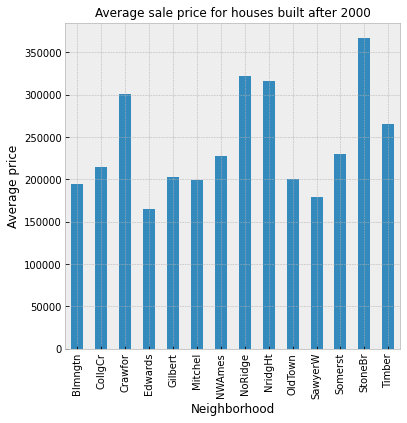

In [93]:
plt.figure(figsize=(6,6))

# Plot
grouped["SalePrice"].mean().plot(ax=plt.gca(), rot=90, kind="bar")

# Prettify
plt.xlabel("Neighborhood")
plt.ylabel("Average price")
plt.title("Average sale price for houses built after 2000", fontsize=12)



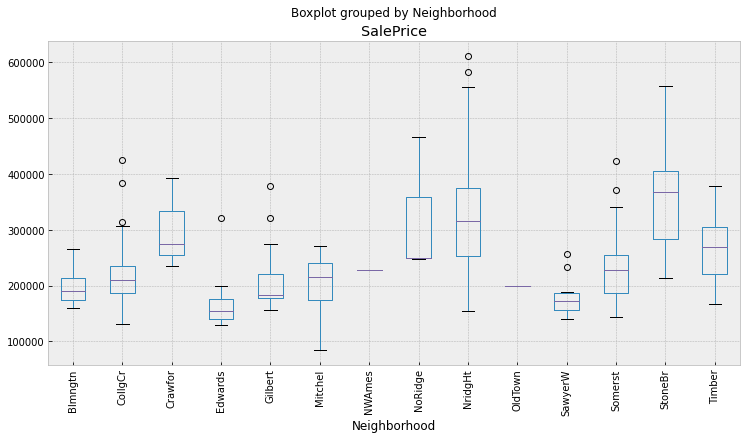

In [66]:
plt.figure(figsize=(12,6))

houses.boxplot("SalePrice", by="Neighborhood", ax=plt.gca(), rot=90)

# Problem 2

For houses, built after 2000, find which year has the lowest average sale price.

In [98]:
#FINAL "short"answer
train[train["YearBuilt"]>=2000].groupby("YearBuilt")["SalePrice"].mean().idxmin()
# train[<mask>].groupby(<key>)[<column>].<aggregation>().idxmin()

2004

In [71]:
houses["YearBuilt"].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
2000    24
2008    23
2002    23
2001    20
2009    18
2010     1
Name: YearBuilt, dtype: int64

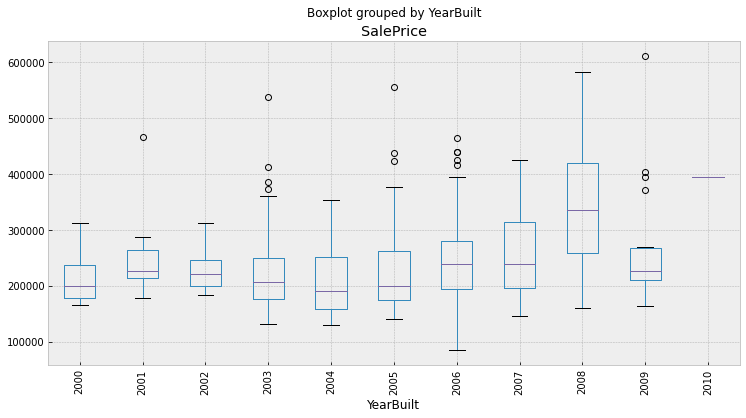

In [70]:
plt.figure(figsize=(12,6))

houses.boxplot("SalePrice", by="YearBuilt", ax=plt.gca(), rot=90)

# Problem 3 (optional)

Given all the houses built after 1990, investigate, which neighborhoods have the worst price dynamics, i.e. those, for which average sale price per (sale) year decreased the most. You can either do this manually by analyzing the corresponding plot, or contruct some code to do this automatically.



Answer:
We only have sales data on 5 years:2006-2010
We have plotted the price dynamics for all neighborhoods
Out of 17 neighborhoods only 11 have enough data points for meaningful analysis
Decided to use the measure of ddifference in average sales price between 2006 and 2010 for each neighborhood.
result is: Timber

In [ ]:
# Create batim df for houses built after 1990
batim=train.loc[train["YearBuilt"]>1990, ["Neighborhood", "YearBuilt","SalePrice","YrSold"]]
batim

In [116]:
# FINAL "short"answer:
(batim[batim["YrSold"]==2006].groupby("Neighborhood")["SalePrice"].mean()-batim[batim["YrSold"]==2010].groupby("Neighborhood")["SalePrice"].mean()).idxmax()

'Timber'

In [ ]:
batim["Neighborhood"].value_counts()



In [104]:
batim2006=batim[batim["YrSold"]==2006].groupby("Neighborhood")["SalePrice"].mean()

Neighborhood
Blmngtn    217087.000000
CollgCr    208183.035714
Edwards    135416.666667
Gilbert    204182.500000
Mitchel    134000.000000
NoRidge    322333.333333
NridgHt    305491.882353
SawyerW    182280.000000
Somerst    210268.875000
StoneBr    419070.000000
Timber     341200.000000
Veenker    270000.000000
Name: SalePrice, dtype: float64

In [109]:
batim2010=batim[batim["YrSold"]==2010].groupby("Neighborhood")["SalePrice"].mean()

In [115]:
(batim[batim["YrSold"]==2006].groupby("Neighborhood")["SalePrice"].mean()-batim[batim["YrSold"]==2010].groupby("Neighborhood")["SalePrice"].mean()).idxmax()

'Timber'

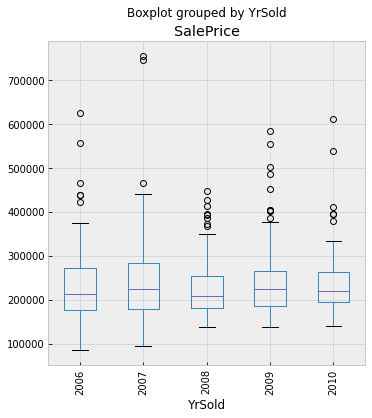

In [82]:
#look at price trends of whole market for houses after 1990
# No visible trends...
plt.figure(figsize=(5.5,6))

batim.boxplot("SalePrice", by="YrSold", ax=plt.gca(), rot=90)

#batim["Neighborhood"=="CollgCr"]

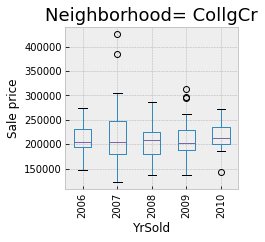

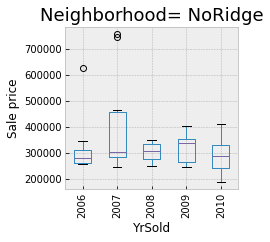

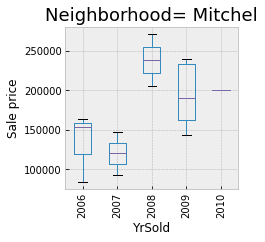

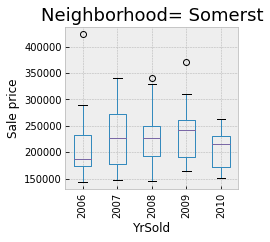

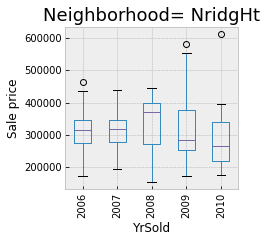

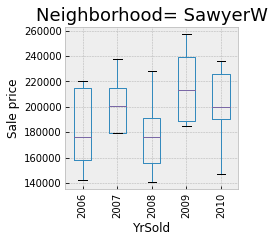

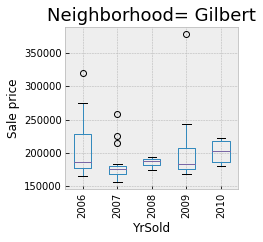

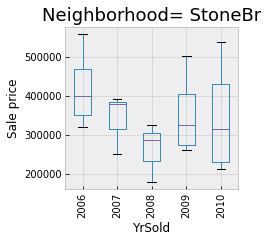

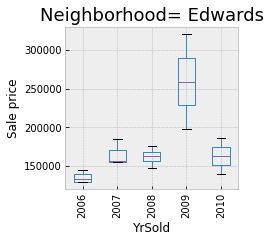

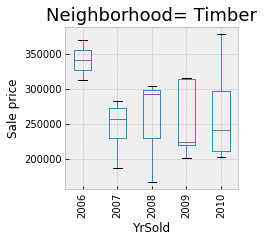

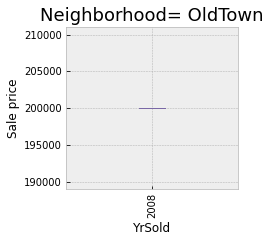

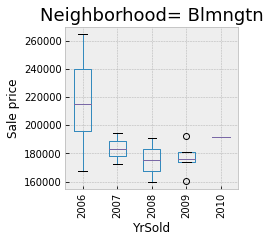

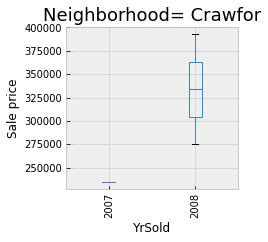

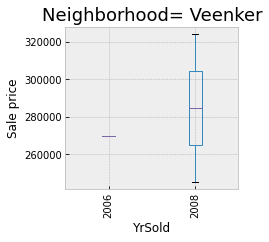

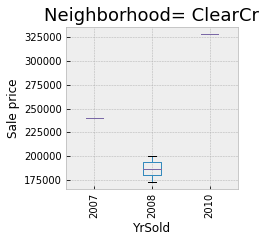

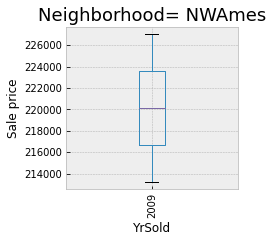

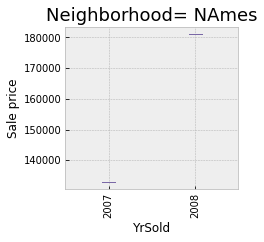

In [101]:
for bt in batim.Neighborhood.unique():
    batim1=batim.loc[batim["Neighborhood"]==bt, ["Neighborhood", "YearBuilt","SalePrice","YrSold"]]
    plt.figure(figsize=(3,3))

    batim1.boxplot("SalePrice", by="YrSold", ax=plt.gca(), rot=90)
    plt.suptitle("")
    plt.ylabel("Sale price")
    plt.title("Neighborhood= "+bt, fontsize=18)

In [89]:
batim["Neighborhood"]
batim.Neighborhood.unique()

array(['CollgCr', 'NoRidge', 'Mitchel', 'Somerst', 'NridgHt', 'SawyerW',
       'Gilbert', 'StoneBr', 'Edwards', 'Timber', 'OldTown', 'Blmngtn',
       'Crawfor', 'Veenker', 'ClearCr', 'NWAmes', 'NAmes'], dtype=object)